## changing data set leads --> seaborn dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
df = sns.load_dataset("iris")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

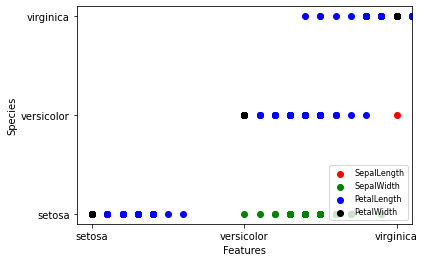

In [13]:
plt.xlabel('Features')
plt.ylabel('Species')
pltx =  df.iloc[: , 1]
plty = df.iloc[:, -1]
plt.scatter(pltx,plty, color='red', Label='SepalLength' )
pltx =  df.iloc[: , 2]
plty = df.iloc[:, -1]
plt.scatter(pltx,plty, color='green', Label='SepalWidth')
pltx =  df.iloc[: , 3]
plty = df.iloc[:, -1]
plt.scatter(pltx,plty, color='blue', Label='PetalLength')
pltx =  df.iloc[: , 4]
plty = df.iloc[:, -1]
plt.scatter(pltx,plty, color='black', Label='PetalWidth')
plt.legend(loc=4, prop={'size':8})
plt.show()

In [15]:
df["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

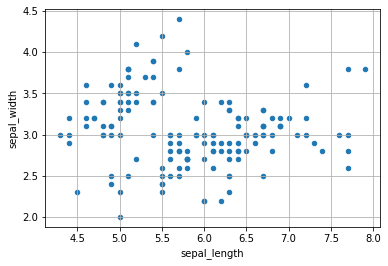

In [16]:
df.plot(kind='scatter', x='sepal_length', y='sepal_width', grid=True)
plt.show()

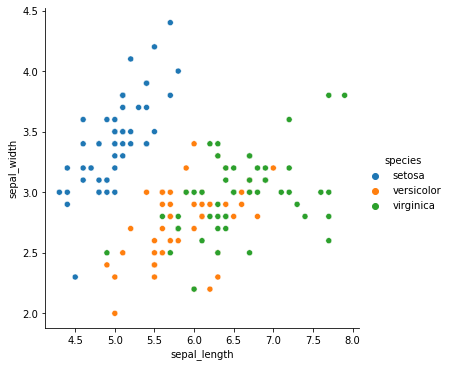

In [17]:
import seaborn as sns
sns.relplot(x="sepal_length", y="sepal_width", hue="species" ,data = df)

## linearly seprable

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state = 42)

In [19]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
df['sps'] = df["species"]  
df['sps']= le.fit_transform(df['sps']) 

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = model.predict(x_test)
print(predictions)    

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa']


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

1.0


In [24]:
model.score(x_train, y_train)

0.9642857142857143